In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df= pd.read_csv('stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some high school,standard,none,47,55,52
1,female,group B,some college,standard,none,55,66,61
2,male,group B,some college,free/reduced,none,57,60,57
3,female,group E,some high school,standard,none,69,67,63
4,male,group B,associate's degree,free/reduced,none,77,72,64


In [3]:
df.shape

(1000, 8)

# Data Checks to Perform

  1. Check Missing values
  2. check Duplicates 
  3. check data type
  4. Check the no of unique values in each columns
  5. Check statistics of data set
  6. Check the various category present in the different categorical columns

In [4]:
## Check Missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Insights or observatio
 There are no missing values

In [5]:
## Checks duplicates
df.duplicated().sum()

1

In [6]:
 df2 = df.drop_duplicates()

In [7]:
df2.duplicated().sum()

0

## There is no duplicates value

In [8]:
## Check data type
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [9]:
## Checking no of unique value in each columns
df2.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     75
reading score                  73
writing score                  76
dtype: int64

In [10]:
## Checking statistics in dataset
df2.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.232232,68.979980,67.733734
std,15.020364,14.293292,14.880458
min,22.000000,23.000000,21.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000


# Insights or observation

. From the above description of numerical data , all means are very close to each other between 66 to 68

. All the standard deviation are also close between 14.2 to 15.02

. While there is minimum is 22 for maths other are having 23 to 21 values

In [11]:
## Explore more info about data
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some high school,standard,none,47,55,52
1,female,group B,some college,standard,none,55,66,61
2,male,group B,some college,free/reduced,none,57,60,57
3,female,group E,some high school,standard,none,69,67,63
4,male,group B,associate's degree,free/reduced,none,77,72,64


In [12]:
[features for features in df2.columns if df2[features].dtype!='O']

['math score', 'reading score', 'writing score']

In [13]:
# Segrregate numerical and categorical features
numerical_features = [features for features in df2.columns if df2[features].dtype!='O']
categorical_features = [features for features in df2.columns if df2[features].dtype=='O']

In [14]:
numerical_features

['math score', 'reading score', 'writing score']

In [15]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [16]:
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some high school,standard,none,47,55,52
1,female,group B,some college,standard,none,55,66,61
2,male,group B,some college,free/reduced,none,57,60,57
3,female,group E,some high school,standard,none,69,67,63
4,male,group B,associate's degree,free/reduced,none,77,72,64


In [17]:
df2["reading score"]

0      55
1      66
2      60
3      67
4      72
       ..
995    59
996    78
997    77
998    74
999    56
Name: reading score, Length: 999, dtype: int64

In [18]:
# aggregate the total score with mean

df['total_score'] = df2['math score'] + df2['reading score'] + df2['writing score']
df['average'] = df['total_score'] / 3
df.head()

                                                                   

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group A,some high school,standard,none,47,55,52,154.0,51.333333
1,female,group B,some college,standard,none,55,66,61,182.0,60.666667
2,male,group B,some college,free/reduced,none,57,60,57,174.0,58.000000
3,female,group E,some high school,standard,none,69,67,63,199.0,66.333333
4,male,group B,associate's degree,free/reduced,none,77,72,64,213.0,71.000000


In [19]:
df['average']

0      51.333333
1      60.666667
2      58.000000
3      66.333333
4      71.000000
         ...    
995    61.000000
996    73.333333
997    75.000000
998    79.000000
999    55.333333
Name: average, Length: 1000, dtype: float64

<AxesSubplot: xlabel='average', ylabel='Count'>

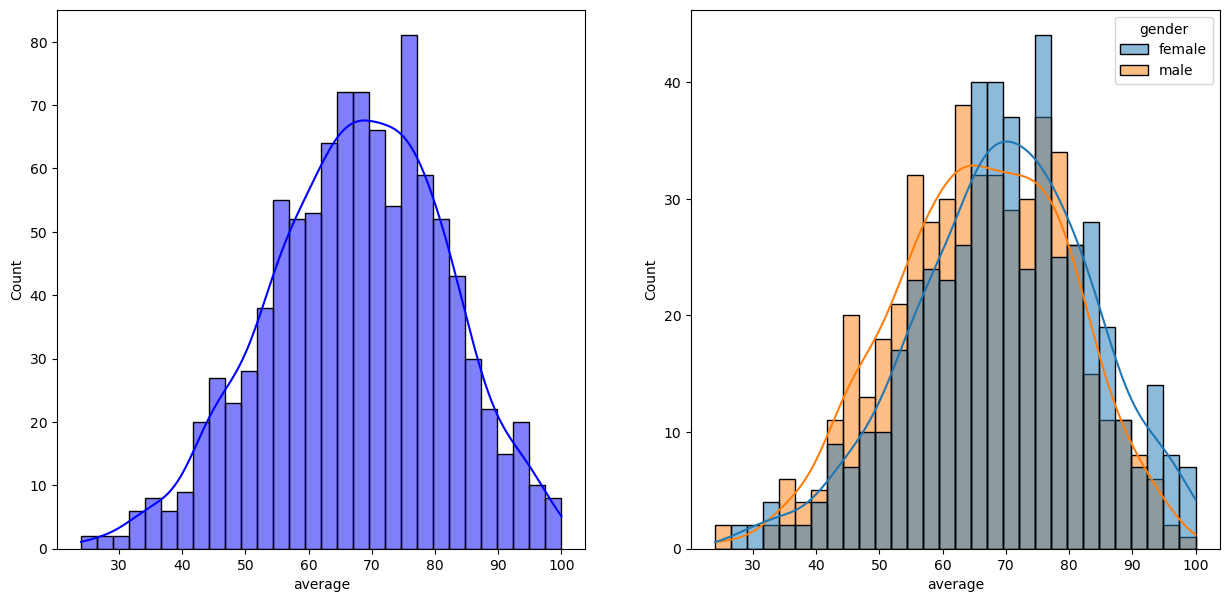

In [20]:
### Explore More Visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')




<AxesSubplot: xlabel='average', ylabel='Count'>

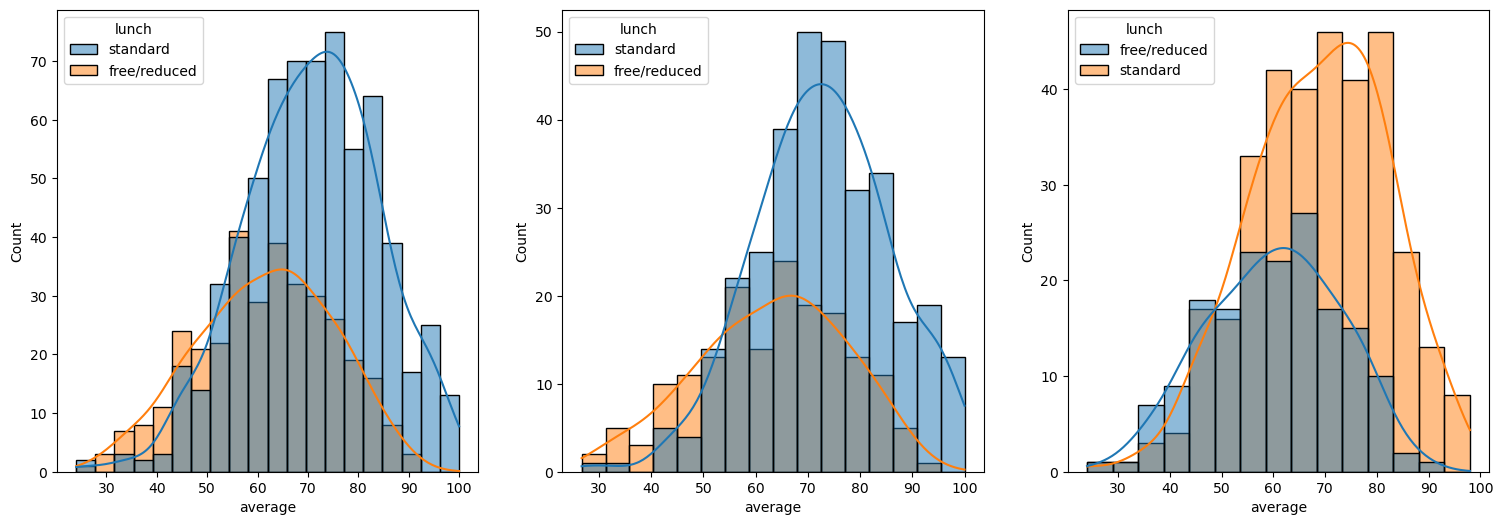

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

#Insights
Standard Lunch help students perform well in exams
Standard lunch helps perform well in exams be it a male of female

In [22]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group A,some high school,standard,none,47,55,52,154.0,51.333333
1,female,group B,some college,standard,none,55,66,61,182.0,60.666667
2,male,group B,some college,free/reduced,none,57,60,57,174.0,58.000000
3,female,group E,some high school,standard,none,69,67,63,199.0,66.333333
4,male,group B,associate's degree,free/reduced,none,77,72,64,213.0,71.000000


In [24]:
df['parental level of education']

0        some high school
1            some college
2            some college
3        some high school
4      associate's degree
              ...        
995           high school
996          some college
997      some high school
998     bachelor's degree
999      some high school
Name: parental level of education, Length: 1000, dtype: object

<AxesSubplot: xlabel='average', ylabel='Count'>

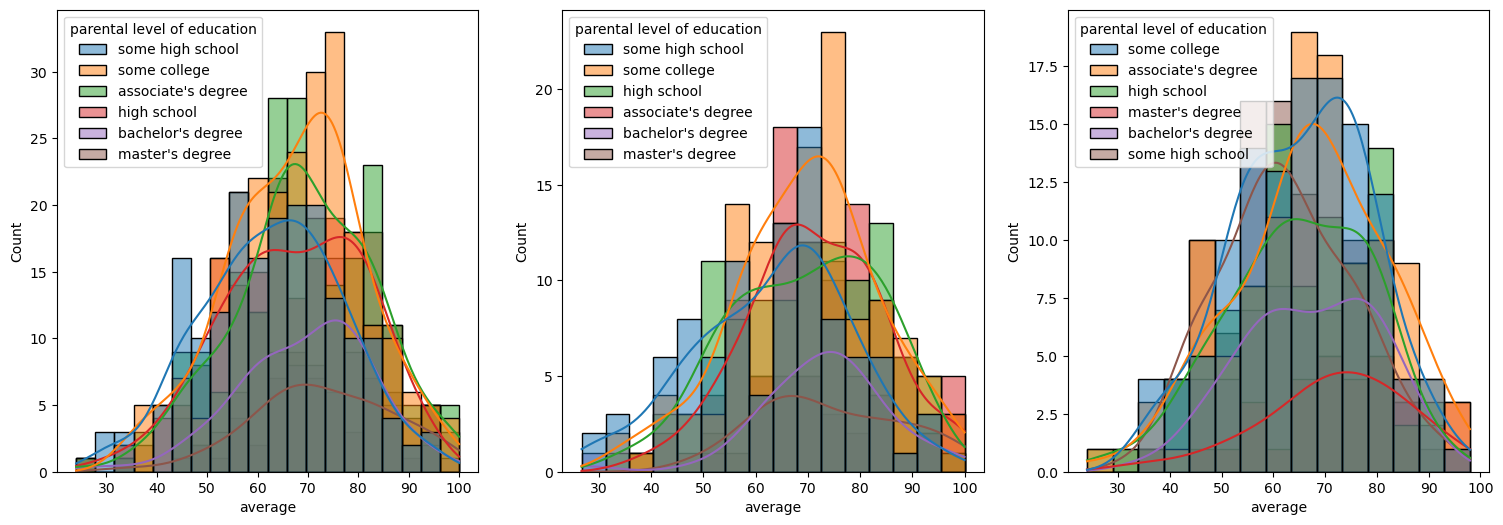

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

##Insights
In general parent's education don't help student perform well in exam.
3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
2nd plot we can see there is no effect of parent's education on female students.

In [28]:
df['race/ethnicity']

0      group A
1      group B
2      group B
3      group E
4      group B
        ...   
995    group C
996    group D
997    group B
998    group B
999    group A
Name: race/ethnicity, Length: 1000, dtype: object

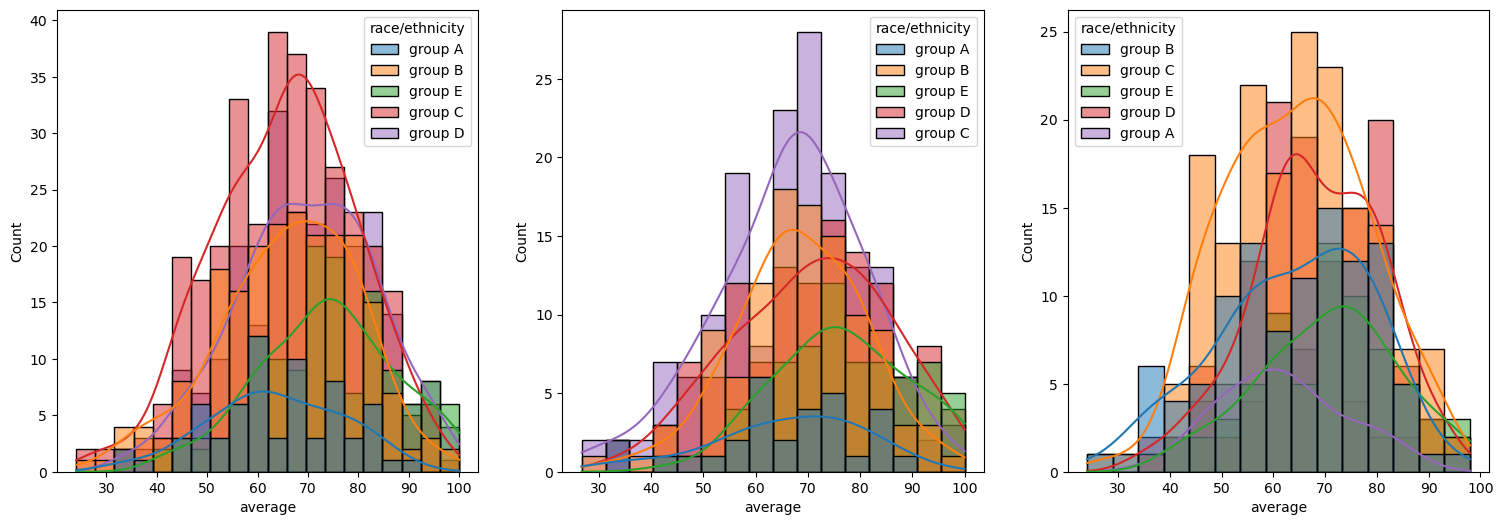

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

##Insights
Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<AxesSubplot: >

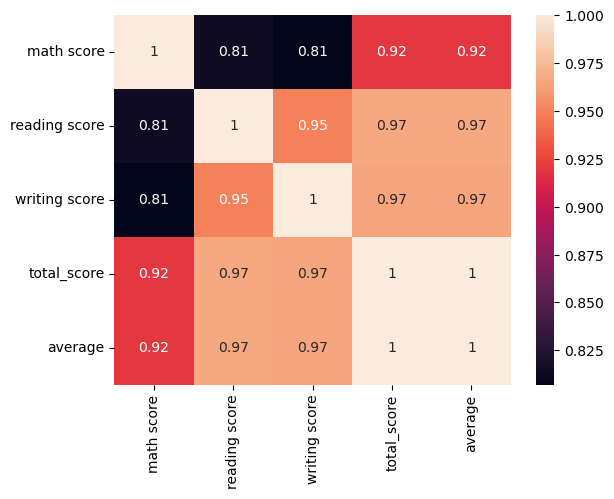

In [30]:
sns.heatmap(df.corr(),annot=True)